# **DataKind Financial Inclusion (Nigeria 2021)**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df_micro_nga = pd.read_csv('/content/micro_nga.csv')
df_micro_nga.head()

,economy,economycode,wpid_random,wgt,female,age,educ,inc_q,emp_in,urbanicity_f2f,...,receive_wages,receive_transfers,receive_pension,receive_agriculture,pay_utilities,remittances,mobileowner,internetaccess,anydigpayment,merchantpay_dig
0,Nigeria,NGA,182358305,0.812816,1,20.0,2,1,1,1,...,4,4,4,4,4,5,1,2,0,0
1,Nigeria,NGA,189983300,0.777928,2,50.0,2,4,1,2,...,1,4,4,4,1,1,1,1,1,0
2,Nigeria,NGA,134173456,1.338439,1,23.0,2,4,1,2,...,4,4,4,4,4,5,2,2,0,0
3,Nigeria,NGA,133272511,0.463378,2,27.0,2,5,1,2,...,1,4,4,4,2,1,1,1,1,1
4,Nigeria,NGA,195787893,2.649132,1,19.0,1,4,2,1,...,4,4,4,4,4,5,2,2,0,0


In [ ]:
df_micro_nga.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 120 columns):
 #    Column               Non-Null Count  Dtype  
---   ------               --------------  -----  
 0    economy              1000 non-null   object 
 1    economycode          1000 non-null   object 
 2    wpid_random          1000 non-null   int64  
 3    wgt                  1000 non-null   float64
 4    female               1000 non-null   int64  
 5    age                  999 non-null    float64
 6    educ                 1000 non-null   int64  
 7    inc_q                1000 non-null   int64  
 8    emp_in               1000 non-null   int64  
 9    urbanicity_f2f       1000 non-null   int64  
 10   account              1000 non-null   int64  
 11   account_fin          1000 non-null   int64  
 12   account_mob          1000 non-null   int64  
 13   fin1_1a              601 non-null    float64
 14   fin1_1b              601 non-null    float64
 15   fin2                

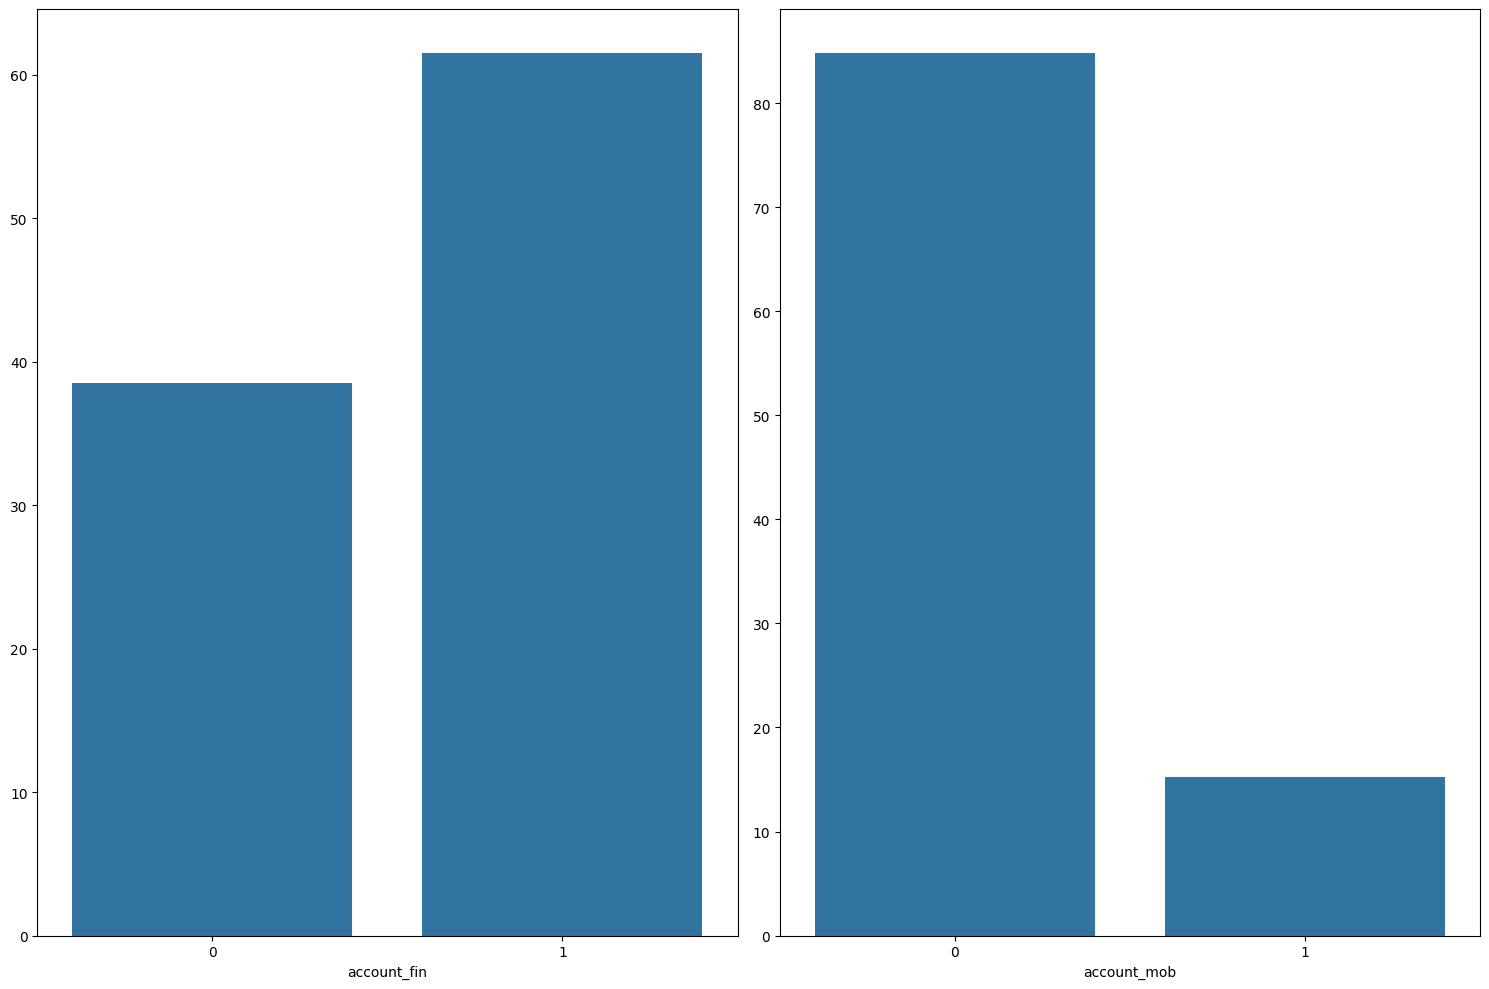

In [ ]:
# Data Exploration

# Clean data
df_micro_nga = df_micro_nga.dropna(subset=['account_fin', 'account_mob'])
df_micro_nga.loc[df_micro_nga['educ'] == 4, 'educ'] = 3

# Calculate percentages by demographic groups
account_fin = df_micro_nga['account_fin'].value_counts(normalize=True) * 100
account_mob = df_micro_nga['account_mob'].value_counts(normalize=True) * 100

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 10))
sns.barplot(x=account_fin.index, y=account_fin.values, ax=axes[0])
sns.barplot(x=account_mob.index, y=account_mob.values, ax=axes[1])
plt.tight_layout()
plt.show();

## **Interpretion:**

- More people have financial institution accounts than mobile money accounts.

- Mobile money adoption is much lower compared to traditional financial institution accounts.

# **1. How does account ownership (financial institution and/or mobile money) vary by gender, age, education level, and income quintile in Nigeria?**

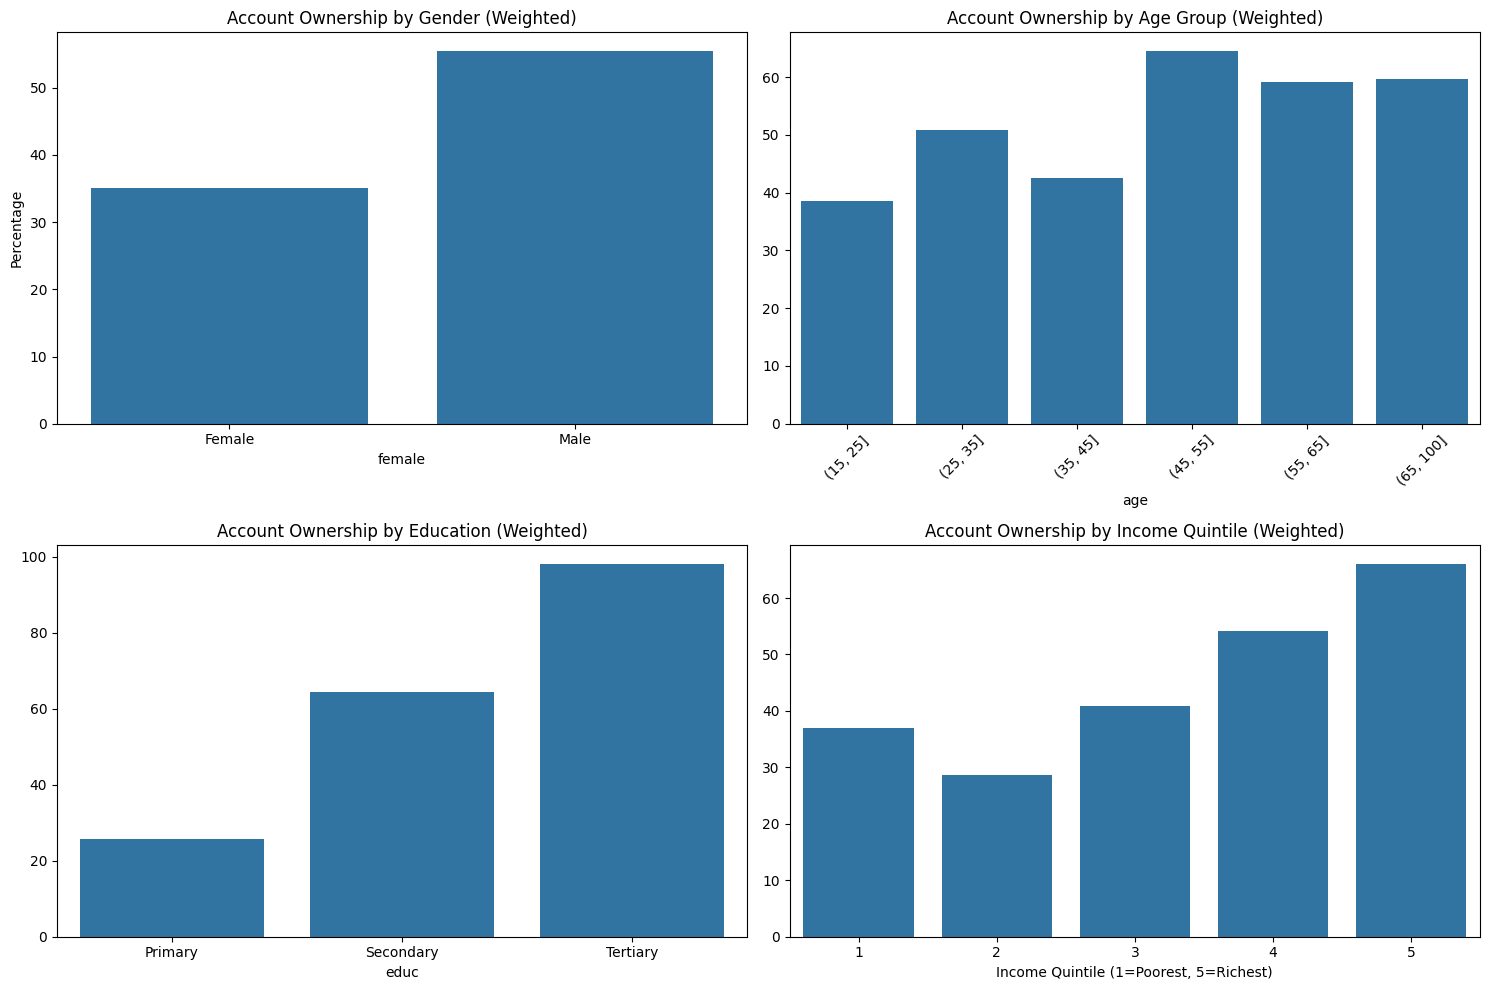

In [ ]:
# Clean data (preserve weights)
df_micro_nga = df_micro_nga.dropna(subset=['account', 'female', 'age', 'educ', 'inc_q', 'wgt'])

# Define weighted mean function
def weighted_mean(df, group_col, target_col='account'):
    return df.groupby(group_col).apply(
        lambda x: np.average(x[target_col], weights=x['wgt']) * 100
    )

# Calculate WEIGHTED percentages
gender_account = weighted_mean(df_micro_nga, 'female')
age_account = weighted_mean(df_micro_nga, pd.cut(df_micro_nga['age'], bins=[15, 25, 35, 45, 55, 65, 100]))
education_account = weighted_mean(df_micro_nga, 'educ')
income_account = weighted_mean(df_micro_nga, 'inc_q')

# Visualization with proper labeling
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Gender plot (map 1=Female, 2=Male)
gender_labels = {1: 'Female', 2: 'Male'}
sns.barplot(x=gender_account.index.map(gender_labels),
            y=gender_account.values,
            ax=axes[0,0],
            order=['Female', 'Male'])
axes[0,0].set_title('Account Ownership by Gender (Weighted)')
axes[0,0].set_ylabel('Percentage')

# Age plot
sns.barplot(x=age_account.index.astype(str),
            y=age_account.values,
            ax=axes[0,1])
axes[0,1].set_title('Account Ownership by Age Group (Weighted)')
axes[0,1].tick_params(axis='x', rotation=45)

# Education plot (map 1=Primary, 2=Secondary, 3=Tertiary)
educ_labels = {1: 'Primary', 2: 'Secondary', 3: 'Tertiary'}
sns.barplot(x=education_account.index.map(educ_labels),
            y=education_account.values,
            ax=axes[1,0],
            order=['Primary', 'Secondary', 'Tertiary'])
axes[1,0].set_title('Account Ownership by Education (Weighted)')

# Income plot (quintiles 1=Poorest, 5=Richest)
sns.barplot(x=income_account.index,
            y=income_account.values,
            ax=axes[1,1])
axes[1,1].set_title('Account Ownership by Income Quintile (Weighted)')
axes[1,1].set_xlabel('Income Quintile (1=Poorest, 5=Richest)')

plt.tight_layout()
plt.show()

In [ ]:
# Statistical analysis
columns = ['female', 'age', 'educ', 'inc_q']
parameters = ['Gender', 'Age', 'Education', 'Income']
for column, parameter in zip(columns, parameters):
    cross_tab = pd.crosstab(df_micro_nga[column], df_micro_nga['account'])
    chi2, p, dof, expected = stats.chi2_contingency(cross_tab)
    print(f"Statistical analysis for {parameter}:")
    print(f"Chi-square statistic: {chi2}, p-value: {p}")
    print("\n")

Statistical analysis for Gender:
Chi-square statistic: 17.301699346450516, p-value: 3.1890153585286925e-05


Statistical analysis for Age:
Chi-square statistic: 117.50542330023183, p-value: 1.9702485673512213e-06


Statistical analysis for Education:
Chi-square statistic: 169.90379533539954, p-value: 1.2760262707591763e-37


Statistical analysis for Income:
Chi-square statistic: 89.23366020454327, p-value: 1.915499264600273e-18




## **Result Interpretation:**

A chi-square test was conducted to check if there is a significant association between gender, age, education, income and account ownership.

**NOTE:**

- If the p-value is low (<0.05), it indicates a statistically significant difference in account ownership between gender, age, education, and income.

- If the p-value is high (>0.05), it suggests that the variables (gender, age, education, and income) do not significantly impact account ownership.

Considering that all four p-values are extremely small (<0.05). This means that there is a statistically significant association between each of the variables (Gender, Age, Education, Income) and the 'account' variable.

Simply put, gender, age, education level, and income quintile affect account ownership.

# **2. How do economic opportunity indicators like wage receipt and government transfers differ between urban and rural areas?**

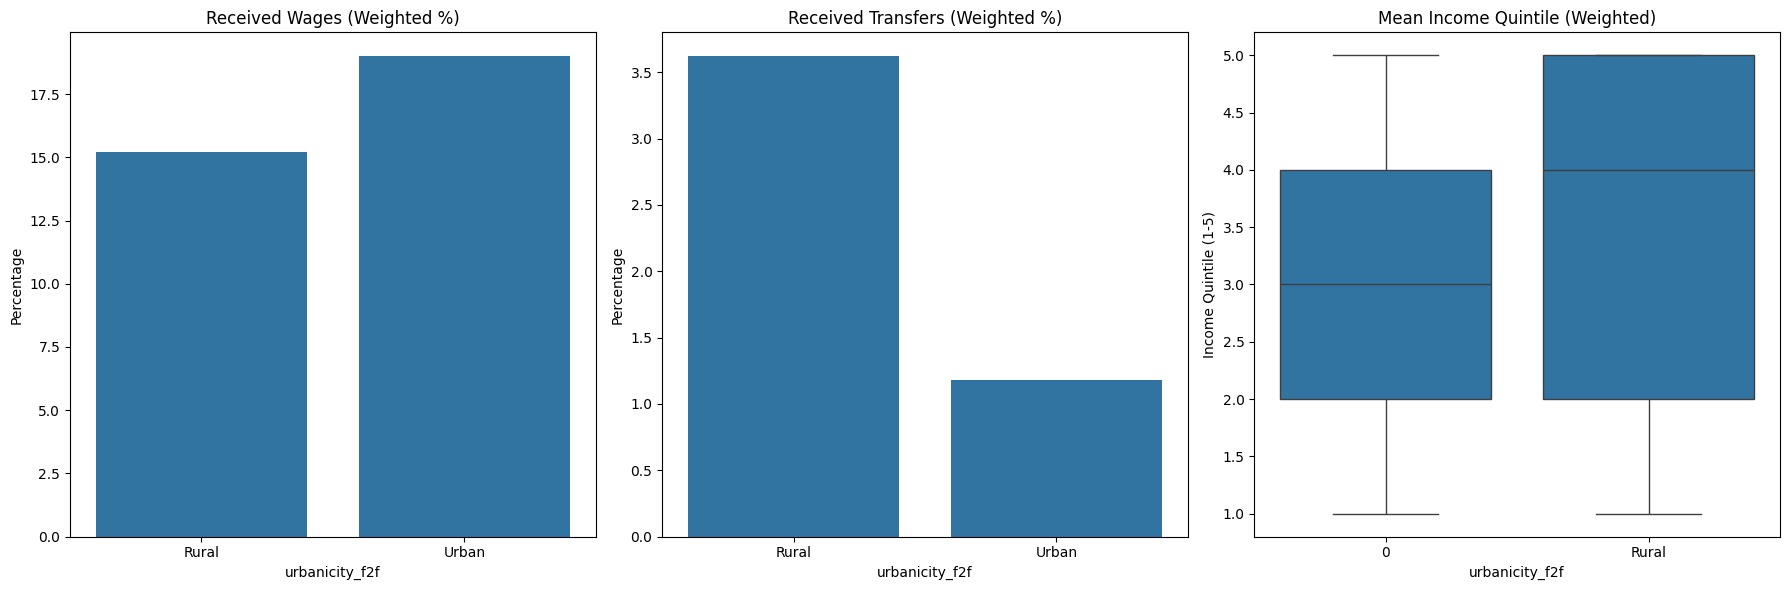

T-statistic: 4.01, p-value: 0.0001


In [ ]:
# 1. Calculate weighted percentages
def weighted_percentage(df, group_var, target_var):
    return df.groupby(group_var).apply(
        lambda x: np.average(x[target_var].isin([1, 2, 3]), weights=x['wgt']) * 100
    )

urban_wages = weighted_percentage(df_micro_nga, 'urbanicity_f2f', 'receive_wages')
urban_transfers = weighted_percentage(df_micro_nga, 'urbanicity_f2f', 'receive_transfers')

# 2. Calculate weighted mean income
urban_income = df_micro_nga.groupby('urbanicity_f2f').apply(
    lambda x: np.average(x['inc_q'], weights=x['wgt'])
)

# 3. Visualization with mapped x-axis labels
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Define label mappings
urban_labels = {1: 'Rural', 2: 'Urban'}

# Plot 1: Wages
sns.barplot(x=urban_wages.index.map(urban_labels), y=urban_wages.values, ax=axes[0], order=['Rural', 'Urban'])
axes[0].set_title('Received Wages (Weighted %)')
axes[0].set_ylabel('Percentage')

# Plot 2: Transfers
sns.barplot(x=urban_transfers.index.map(urban_labels), y=urban_transfers.values, ax=axes[1], order=['Rural', 'Urban'])
axes[1].set_title('Received Transfers (Weighted %)')
axes[1].set_ylabel('Percentage')

# Plot 3: Income (bar plot for weighted means)
sns.boxplot(x='urbanicity_f2f', y='inc_q', data=df_micro_nga, ax=axes[2])
axes[2].set_xticklabels([urban_labels.get(int(val), val) for val in axes[2].get_xticks()]) # Map labels after plotting
axes[2].set_title('Mean Income Quintile (Weighted)')
axes[2].set_ylabel('Income Quintile (1-5)')

plt.tight_layout()
plt.show()

# 4. Statistical test (unweighted)
urban = df_micro_nga[df_micro_nga['urbanicity_f2f'] == 2]['inc_q']
rural = df_micro_nga[df_micro_nga['urbanicity_f2f'] == 1]['inc_q']
t_stat, p_value = stats.ttest_ind(urban, rural, nan_policy='omit')
print(f"T-statistic: {t_stat:.2f}, p-value: {p_value:.4f}")

**Result Interpretation:**

**Wages (Left Chart):** Urban and rural areas have almost similar percentages of wage earners.

**Transfers (Middle Chart):** A higher proportion of rural residents receive transfers compared to urban residents. That may be because urban dwellers have relations in rural areas whom they send money to.

**Right Chart (Income by Urbanicity - Boxplot):**

- Urban residents have a higher median income than rural residents.

- The interquartile range (spread of incomes) is larger in urban areas.

**Interpretation of Stattistical Results:**

- Because the p-value is significantly less than 0.05, we reject the null hypothesis.

- The null hypothesis for a t-test is that there is no significant difference between the means of the two groups.

Therefore, we conclude that there is a statistically significant difference in the mean income quintiles between urban and rural areas in your dataset.

More specifically, because the T-statistic is positive, that means that the average of the urban group is larger than the rural group. So, on average, the urban group has a higher income quintile (which is no surprise).


In simpler terms, there's strong evidence that urban settlers have, on average, higher income quintiles than rural areas.

# **3. What is the adoption rate of digital payment methods in Nigeria, and how does this vary by demographic factors?**

In [ ]:
# 1. Calculate WEIGHTED digital payment adoption rate
weighted_adoption = np.average(df_micro_nga['anydigpayment'], weights=df_micro_nga['wgt']) * 100
print(f"WEIGHTED Digital Payment Adoption Rate in Nigeria: {weighted_adoption:.2f}%")

WEIGHTED Digital Payment Adoption Rate in Nigeria: 33.78%


In [ ]:
# Analyze variations by demographic factors (WITH WEIGHTS)
def weighted_adoption_rate(data, group_var, target_var, weight_var='wgt'):
    """Calculate weighted adoption rate by a demographic group."""
    grouped = data.groupby(group_var).apply(
        lambda x: np.average(x[target_var], weights=x[weight_var]) * 100
    )
    return grouped

# Define demographic variables
demographics = {
    'Gender': 'female',          # 1=Female, 2=Male
    'Education Level': 'educ',   # 1=Primary or less, 2=Secondary, 3=Tertiary+
    'Income Quintile': 'inc_q',  # 1=Poorest, 5=Richest
    'Urban/Rural': 'urbanicity_f2f',  # 1=Rural, 2=Urban
    'Employment Status': 'emp_in'     # 1=In workforce, 2=Out of workforce
}

# Calculate weighted adoption rates
weighted_results_dig = {}
for name, var in demographics.items():
    weighted_results_dig[name] = weighted_adoption_rate(df_micro_nga, var, target_var='anydigpayment')

# Display results
for name, rates in weighted_results_dig.items():
    print(f"\nWEIGHTED Adoption by {name}:")
    print(rates)


WEIGHTED Adoption by Gender:
female
1    22.685970
2    44.611672
dtype: float64

WEIGHTED Adoption by Education Level:
educ
1    16.117677
2    50.782849
3    86.630547
dtype: float64

WEIGHTED Adoption by Income Quintile:
inc_q
1    22.256399
2    17.694357
3    31.569095
4    41.431562
5    55.619399
dtype: float64

WEIGHTED Adoption by Urban/Rural:
urbanicity_f2f
1    23.670424
2    41.480095
dtype: float64

WEIGHTED Adoption by Employment Status:
emp_in
1    39.471582
2    19.156627
dtype: float64


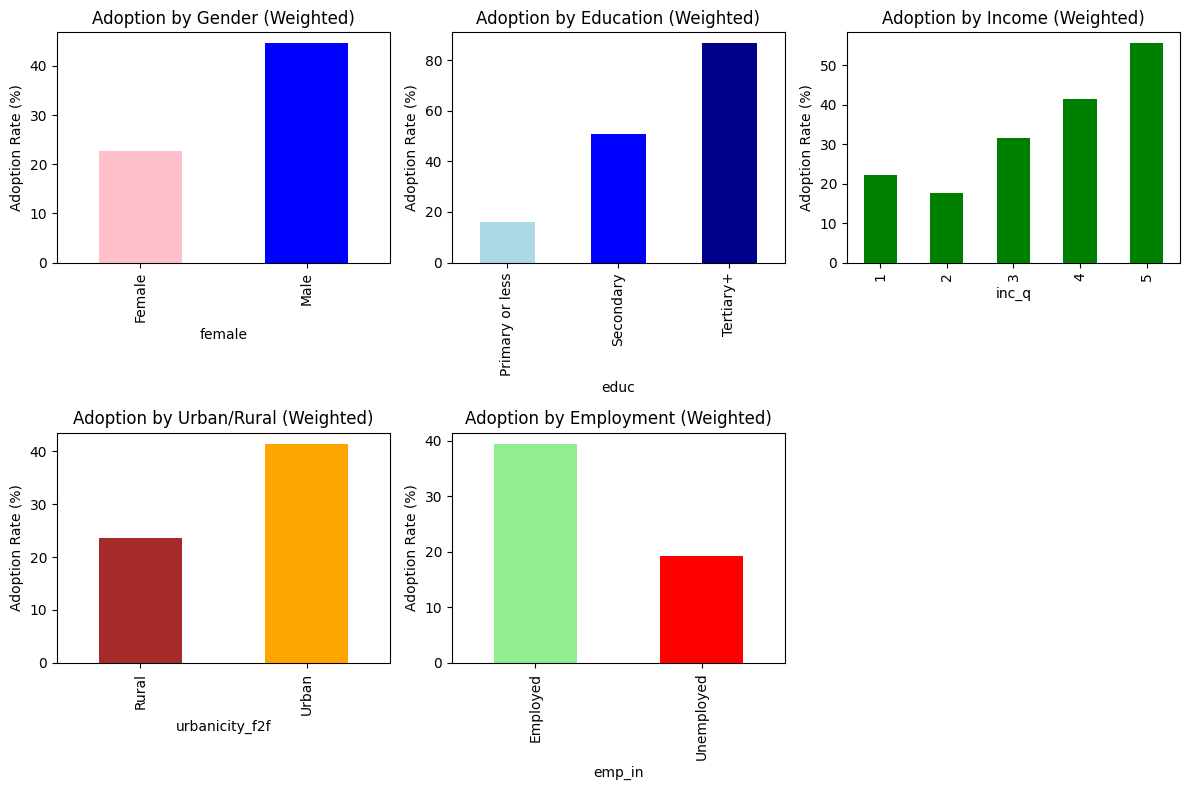

In [ ]:
# Visualizations (using weighted results)
plt.figure(figsize=(12, 8))

# Plot adoption by gender
plt.subplot(2, 3, 1)
gender_labels = {1: 'Female', 2: 'Male'}
gender_rates = weighted_results_dig['Gender'].rename(index=gender_labels)
gender_rates.plot(kind='bar', color=['pink', 'blue'])
plt.title('Adoption by Gender (Weighted)')
plt.ylabel('Adoption Rate (%)')

# Plot adoption by education
plt.subplot(2, 3, 2)
educ_labels = {1: 'Primary or less', 2: 'Secondary', 3: 'Tertiary+'}
educ_rates = weighted_results_dig['Education Level'].rename(index=educ_labels)
educ_rates.plot(kind='bar', color=['lightblue', 'blue', 'darkblue'])
plt.title('Adoption by Education (Weighted)')
plt.ylabel('Adoption Rate (%)')

# Plot adoption by income quintile
plt.subplot(2, 3, 3)
income_rates = weighted_results_dig['Income Quintile']
income_rates.plot(kind='bar', color='green')
plt.title('Adoption by Income (Weighted)')
plt.ylabel('Adoption Rate (%)')

# Plot adoption by urban/rural
plt.subplot(2, 3, 4)
urban_labels = {1: 'Rural', 2: 'Urban'}
urban_rates = weighted_results_dig['Urban/Rural'].rename(index=urban_labels)
urban_rates.plot(kind='bar', color=['brown', 'orange'])
plt.title('Adoption by Urban/Rural (Weighted)')
plt.ylabel('Adoption Rate (%)')

# Plot adoption by employment status
plt.subplot(2, 3, 5)
emp_labels = {1: 'Employed', 2: 'Unemployed'}
emp_rates = weighted_results_dig['Employment Status'].rename(index=emp_labels)
emp_rates.plot(kind='bar', color=['lightgreen', 'red'])
plt.title('Adoption by Employment (Weighted)')
plt.ylabel('Adoption Rate (%)')

plt.tight_layout()
plt.show()

**Result Interpretation:**

Although the adoption rate of digital payment amongst Nigerians is quite low < 35%, adoption rates are affected by several demographic factors:

- Gender: Males have a significantly higher adoption rate than females.

- Education: Higher education levels correlate with higher adoption rates.

- Income: Digital payment adoption increases with income level.

- Urban/Rural: Urban residents adopt digital payments at a higher rate than rural residents.

- Employment: Employed individuals are more likely to adopt digital payments than unemployed individuals.

# **4. What is the adoption rate of mobile money in Nigeria, and how does this vary by demographic factors?**

In [ ]:
# Weighted mobile money adoption
weighted_mobile_money = np.average(df_micro_nga['account_mob'], weights=df_micro_nga['wgt']) * 100
print(f"\nWEIGHTED Mobile Money Adoption Rate: {weighted_mobile_money:.2f}%")


WEIGHTED Mobile Money Adoption Rate: 8.66%


In [ ]:
# Weighted internet access rate (recoded: 1=Yes, 0=No/DK/Refused)
mobile_money = df_micro_nga['account_mob'].apply(lambda x: 1 if x == 1 else 0)
weighted_mm = np.average(mobile_money, weights=df_micro_nga['wgt']) * 100
print(f"WEIGHTED Mobile Money Adoption Rate: {weighted_mm:.2f}%")

# Define demographic variables
demographics = {
    'Gender': 'female',          # 1=Female, 2=Male
    'Education Level': 'educ',   # 1=Primary or less, 2=Secondary, 3=Tertiary+
    'Income Quintile': 'inc_q',  # 1=Poorest, 5=Richest
    'Urban/Rural': 'urbanicity_f2f',  # 1=Rural, 2=Urban
    'Employment Status': 'emp_in'     # 1=In workforce, 2=Out of workforce
}

# Calculate weighted adoption rates
weighted_results_mm = {}
for name, var in demographics.items():
    weighted_results_mm[name] = weighted_adoption_rate(df_micro_nga, var, target_var='account_mob')

# Display results
for name, rates in weighted_results_mm.items():
    print(f"\nWEIGHTED Adoption by {name}:")
    print(rates)

WEIGHTED Mobile Money Adoption Rate: 8.66%

WEIGHTED Adoption by Gender:
female
1     5.480401
2    11.765545
dtype: float64

WEIGHTED Adoption by Education Level:
educ
1     1.595417
2    15.417137
3    31.312318
dtype: float64

WEIGHTED Adoption by Income Quintile:
inc_q
1     3.754405
2     3.055210
3     8.942636
4    10.445188
5    16.971551
dtype: float64

WEIGHTED Adoption by Urban/Rural:
urbanicity_f2f
1     3.926469
2    12.267397
dtype: float64

WEIGHTED Adoption by Employment Status:
emp_in
1    10.288994
2     4.476680
dtype: float64


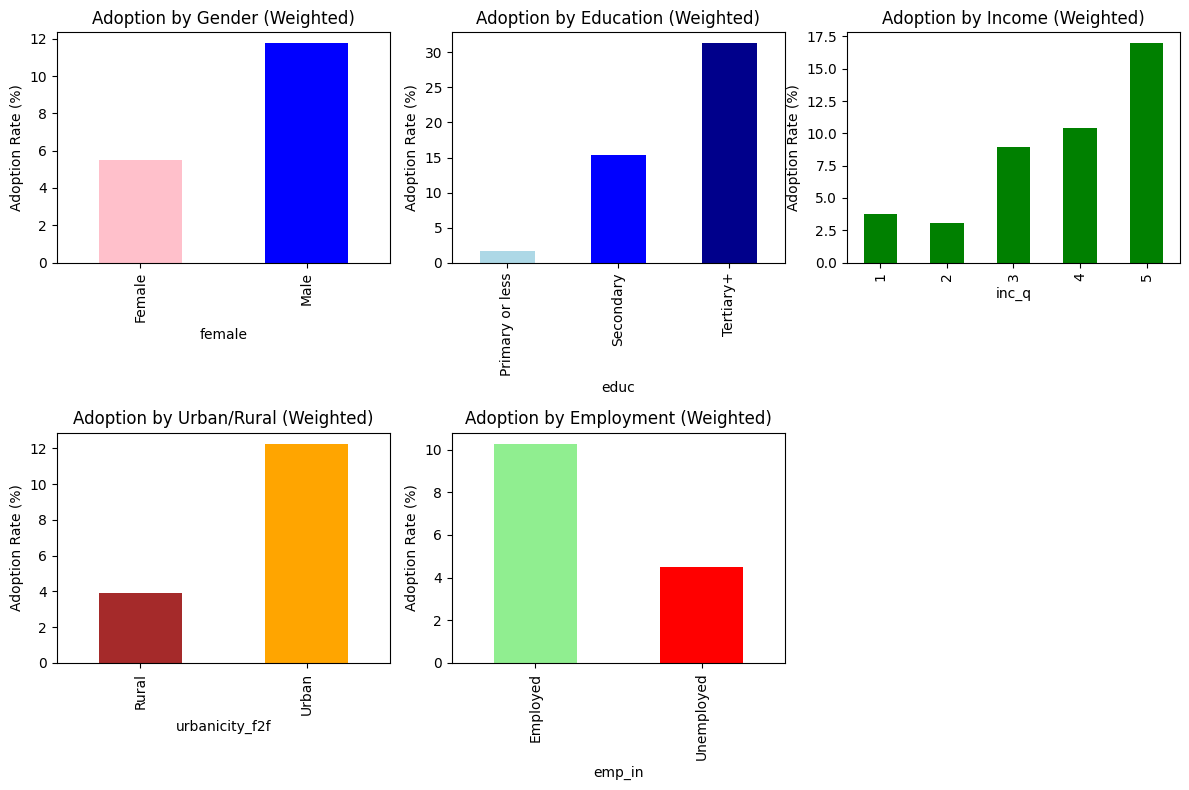

In [ ]:
# Visualizations (using weighted results)
plt.figure(figsize=(12, 8))

# Plot adoption by gender
plt.subplot(2, 3, 1)
gender_labels = {1: 'Female', 2: 'Male'}
gender_rates = weighted_results_mm['Gender'].rename(index=gender_labels)
gender_rates.plot(kind='bar', color=['pink', 'blue'])
plt.title('Adoption by Gender (Weighted)')
plt.ylabel('Adoption Rate (%)')

# Plot adoption by education
plt.subplot(2, 3, 2)
educ_labels = {1: 'Primary or less', 2: 'Secondary', 3: 'Tertiary+'}
educ_rates = weighted_results_mm['Education Level'].rename(index=educ_labels)
educ_rates.plot(kind='bar', color=['lightblue', 'blue', 'darkblue'])
plt.title('Adoption by Education (Weighted)')
plt.ylabel('Adoption Rate (%)')

# Plot adoption by income quintile
plt.subplot(2, 3, 3)
income_rates = weighted_results_mm['Income Quintile']
income_rates.plot(kind='bar', color='green')
plt.title('Adoption by Income (Weighted)')
plt.ylabel('Adoption Rate (%)')

# Plot adoption by urban/rural
plt.subplot(2, 3, 4)
urban_labels = {1: 'Rural', 2: 'Urban'}
urban_rates = weighted_results_mm['Urban/Rural'].rename(index=urban_labels)
urban_rates.plot(kind='bar', color=['brown', 'orange'])
plt.title('Adoption by Urban/Rural (Weighted)')
plt.ylabel('Adoption Rate (%)')

# Plot adoption by employment status
plt.subplot(2, 3, 5)
emp_labels = {1: 'Employed', 2: 'Unemployed'}
emp_rates = weighted_results_mm['Employment Status'].rename(index=emp_labels)
emp_rates.plot(kind='bar', color=['lightgreen', 'red'])
plt.title('Adoption by Employment (Weighted)')
plt.ylabel('Adoption Rate (%)')

plt.tight_layout()
plt.show()

**Result Interpretation:**

Although the adoption rate of mobile money amongst Nigerians is quite low < 9%, adoption rates are affected by several demographic factors:

- Gender: Males adopt mobile money at a higher rate than females.

- Education: Adoption increases with education level, with tertiary-educated individuals having the highest rate.

- Income: Higher income groups have higher mobile money adoption rates.

- Urban/Rural: Urban residents adopt mobile money at a significantly higher rate than rural residents.

- Employment: Employed individuals have a higher adoption rate than unemployed individuals.

# **5. What are the primary barriers to account ownership (Financial Institution and Mobile) in Nigeria**

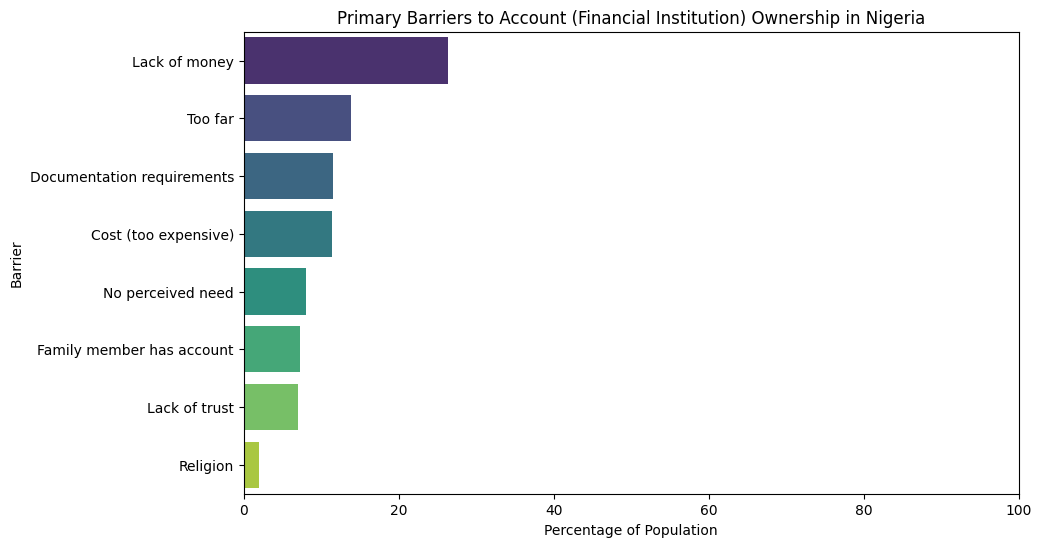

Barriers to Account (Financial Institution) Ownership in Nigeria:
                   Barrier  Percentage
             Lack of money   26.426426
                   Too far   13.913914
Documentation requirements   11.511512
      Cost (too expensive)   11.411411
         No perceived need    8.008008
 Family member has account    7.207207
             Lack of trust    7.007007
                  Religion    2.002002


In [ ]:
# Barriers to Account ownership (Financial Institution)

# Select relevant columns for analysis
barrier_columns = [
    'fin11a',  # Too far
    'fin11b',  # Too expensive
    'fin11c',  # Lack documentation
    'fin11d',  # Lack trust
    'fin11e',  # Religion
    'fin11f',  # Lack money
    'fin11g',  # Family member has account
    'fin11h'   # No need for services
]

# Create a subset dataframe with only the barrier columns
barriers_df = df_micro_nga[barrier_columns]

# Replace values: 1 = barrier, 0 = not a barrier, and handle missing values
# Convert to binary (1 for barrier, 0 otherwise)
for col in barrier_columns:
    barriers_df[col] = np.where(barriers_df[col] == 1, 1, 0)
    barriers_df[col] = barriers_df[col].replace([2, 3, 4], 0)  # Not a barrier or missing

# Calculate the percentage of each barrier
barrier_percentages = barriers_df.mean() * 100

# Create a DataFrame for better visualization
barrier_df = pd.DataFrame({
    'Barrier': barrier_percentages.index,
    'Percentage': barrier_percentages.values
})

# Map column names to more readable labels
barrier_labels = {
    'fin11a': 'Too far',
    'fin11b': 'Cost (too expensive)',
    'fin11c': 'Documentation requirements',
    'fin11d': 'Lack of trust',
    'fin11e': 'Religion',
    'fin11f': 'Lack of money',
    'fin11g': 'Family member has account',
    'fin11h': 'No perceived need'
}

barrier_df['Barrier'] = barrier_df['Barrier'].map(barrier_labels)

# Sort by percentage
barrier_df = barrier_df.sort_values(by='Percentage', ascending=False)

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x='Percentage', y='Barrier', data=barrier_df, palette='viridis')
plt.title('Primary Barriers to Account (Financial Institution) Ownership in Nigeria')
plt.xlabel('Percentage of Population')
plt.ylabel('Barrier')
plt.xlim(0, 100)
plt.show()

# Display the numerical results
print("Barriers to Account (Financial Institution) Ownership in Nigeria:")
print(barrier_df.to_string(index=False))

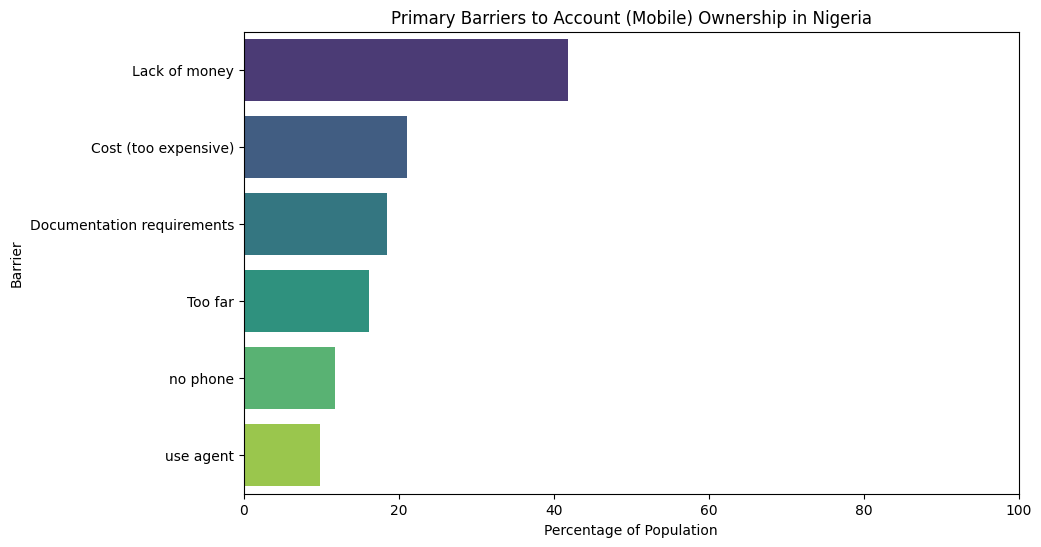

Barriers to Account (Mobile) Ownership in Nigeria:
                   Barrier  Percentage
             Lack of money   41.841842
      Cost (too expensive)   21.121121
Documentation requirements   18.518519
                   Too far   16.216216
                  no phone   11.811812
                 use agent    9.809810


In [ ]:
# Barriers to Account ownership (Mobile)

# Select relevant columns for analysis
barrier_columns_mob = [
    'fin13_1a',  # Too far
    'fin13_1b',  # Too expensive
    'fin13_1c',  # Lack documentation
    'fin13_1d',  # Lack money
    'fin13_1e',  # use agent
    'fin13_1f'  # no phone
]

# Create a subset dataframe with only the barrier columns
barriers_df_mob = df_micro_nga[barrier_columns_mob]

# Replace values: 1 = barrier, 0 = not a barrier, and handle missing values
# Convert to binary (1 for barrier, 0 otherwise)
for col in barrier_columns_mob:
    barriers_df_mob[col] = np.where(barriers_df_mob[col] == 1, 1, 0)
    barriers_df_mob[col] = barriers_df_mob[col].replace([2, 3, 4], 0)  # Not a barrier or missing

# Calculate the percentage of each barrier
barrier_percentages_mob = barriers_df_mob.mean() * 100

# Create a DataFrame for better visualization
barrier_df_mob = pd.DataFrame({
    'Barrier': barrier_percentages_mob.index,
    'Percentage': barrier_percentages_mob.values
})

# Map column names to more readable labels
barrier_labels_mob = {
    'fin13_1a': 'Too far',
    'fin13_1b': 'Cost (too expensive)',
    'fin13_1c': 'Documentation requirements',
    'fin13_1d': 'Lack of money',
    'fin13_1e': 'use agent',
    'fin13_1f': 'no phone'
}

barrier_df_mob['Barrier'] = barrier_df_mob['Barrier'].map(barrier_labels_mob)

# Sort by percentage
barrier_df_mob = barrier_df_mob.sort_values(by='Percentage', ascending=False)

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x='Percentage', y='Barrier', data=barrier_df_mob, palette='viridis')
plt.title('Primary Barriers to Account (Mobile) Ownership in Nigeria')
plt.xlabel('Percentage of Population')
plt.ylabel('Barrier')
plt.xlim(0, 100)
plt.show()

# Display the numerical results
print("Barriers to Account (Mobile) Ownership in Nigeria:")
print(barrier_df_mob.to_string(index=False))

## **Result Interpretation:**

The dominant barrier across both financial institution and mobile account ownership is "Lack of Money", highlighting financial constraints as the main reason for financial exclusion in Nigeria.

Other dominant barriers include;
- Documentation Requirements: Strict KYC (Know Your Customer) regulations make it difficult for some individuals to open accounts.

- Cost (Too Expensive): The fees associated with maintaining a bank account deter some individuals.

# **6. What percentage of Nigerians save or borrow money, and what channels (formal financial institutions, mobile money, informal savings clubs) are most commonly used?**

Percentage of Nigerians who saved money: 63.7%
Percentage of Nigerians who borrowed money: 56.3%

Saving channels among those who saved:
              Channel  Percentage
Financial institution   45.440252
Informal savings club   40.566038
         Mobile money    5.503145 

Borrowing channels among those who borrowed:
              Channel  Percentage
    Family or friends   80.960854
Financial institution   11.565836
Informal savings club   10.854093 



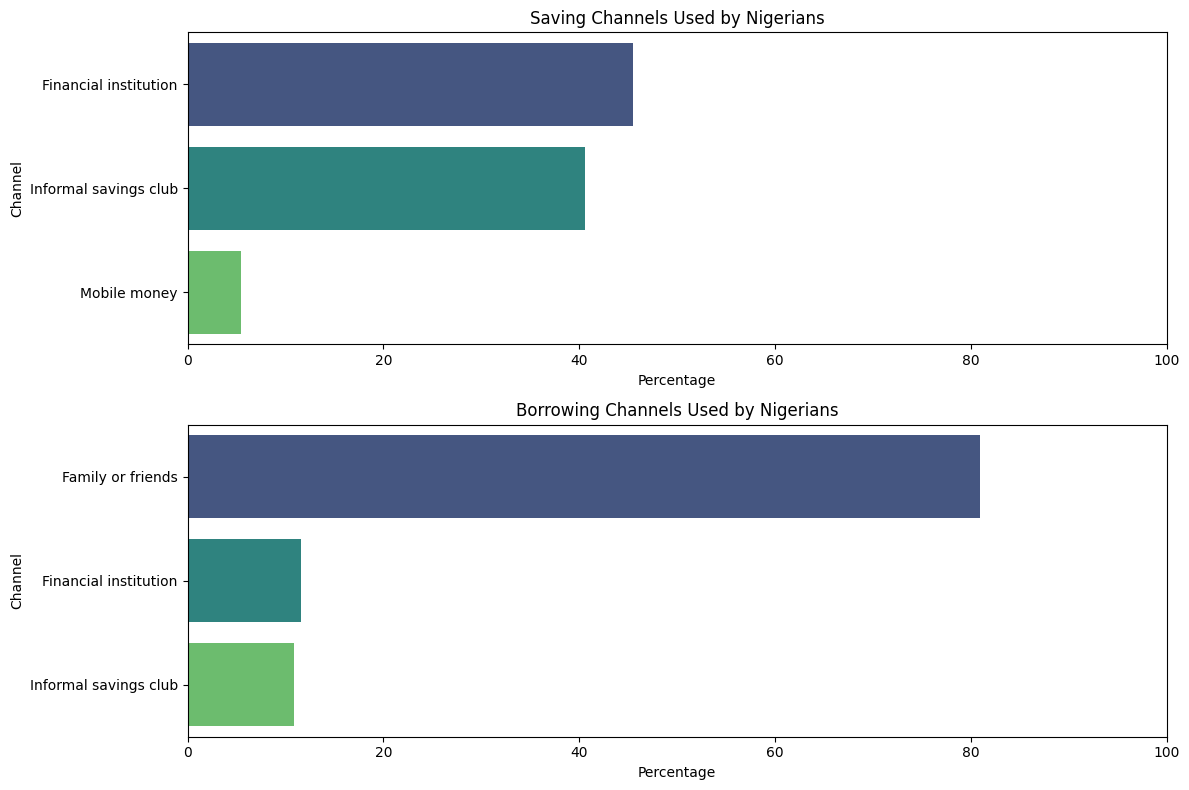

In [ ]:
# Calculate overall saving and borrowing percentages
total_respondents = len(df_micro_nga)
savers = (df_micro_nga['saved'] == 1).sum()
borrowers = (df_micro_nga['borrowed'] == 1).sum()

saving_percentage = (savers / total_respondents) * 100
borrowing_percentage = (borrowers / total_respondents) * 100

print(f"Percentage of Nigerians who saved money: {saving_percentage:.1f}%")
print(f"Percentage of Nigerians who borrowed money: {borrowing_percentage:.1f}%\n")

# Analyze saving channels
saving_channels = {
    'Financial institution': (df_micro_nga['fin17a'] == 1).sum(),
    'Mobile money': (df_micro_nga['fin17a1'] == 1).sum(),
    'Informal savings club': (df_micro_nga['fin17b'] == 1).sum()
}

# Calculate percentages
for channel, count in saving_channels.items():
    saving_channels[channel] = (count / savers) * 100

saving_channels_df = pd.DataFrame(list(saving_channels.items()), columns=['Channel', 'Percentage'])
saving_channels_df = saving_channels_df.sort_values('Percentage', ascending=False)

print("Saving channels among those who saved:")
print(saving_channels_df.to_string(index=False), "\n")

# Analyze borrowing channels
borrowing_channels = {
    'Financial institution': (df_micro_nga['fin22a'] == 1).sum(),
    'Family or friends': (df_micro_nga['fin22b'] == 1).sum(),
    'Informal savings club': (df_micro_nga['fin22c'] == 1).sum()
}

# Calculate percentages
for channel, count in borrowing_channels.items():
    borrowing_channels[channel] = (count / borrowers) * 100

borrowing_channels_df = pd.DataFrame(list(borrowing_channels.items()), columns=['Channel', 'Percentage'])
borrowing_channels_df = borrowing_channels_df.sort_values('Percentage', ascending=False)

print("Borrowing channels among those who borrowed:")
print(borrowing_channels_df.to_string(index=False), "\n")

# Visualization
plt.figure(figsize=(12, 8))

# Saving channels
plt.subplot(2, 1, 1)
sns.barplot(x='Percentage', y='Channel', data=saving_channels_df, palette='viridis')
plt.title('Saving Channels Used by Nigerians')
plt.xlabel('Percentage')
plt.ylabel('Channel')
plt.xlim(0, 100)

# Borrowing channels
plt.subplot(2, 1, 2)
sns.barplot(x='Percentage', y='Channel', data=borrowing_channels_df, palette='viridis')
plt.title('Borrowing Channels Used by Nigerians')
plt.xlabel('Percentage')
plt.ylabel('Channel')
plt.xlim(0, 100)

plt.tight_layout()
plt.show()

## **Result Interpretation:**

- Many Nigerians prefer to save through formal financial institutions or informal savings groups rather than mobile money.

- Most Nigerians rely on family or friends for loans rather than formal financial institutions. This may indicate barriers to accessing credit from banks, such as strict requirements or high-interest rates.
Although informal savings clubs serve as an alternative, they are still less popular compared to borrowing from financial institutions and family or friends.